## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'C:\Users\pears\Desktop\CF\Achievement 6\datasets\exercise'

In [5]:
df = pd.read_csv(os.path.join(path, 'real_estate.csv'))

In [6]:
df.shape

(414, 8)

In [7]:
df.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
df.rename(columns = {'transaction date' : 'Date', 'house age': 'House age', 'distance to the nearest MRT station': 'D. metro', 'number of convenience stores': 'N. shops', 'house price of unit area': 'Price per unit', 'latitude' : 'Latitude', 'longitude' : 'Longitude' }, inplace = True)

In [9]:
df.head()

,No,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### 2. The elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 
# Creates a score that represents rate of variation for the given cluster option.

score

C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: K

[-663923028.4639183,
 -187053609.80588204,
 -61014500.64465423,
 -42896606.653960645,
 -27765250.59413057,
 -20767904.454134833,
 -16860993.374954544,
 -13922573.841754317,
 -12224521.763511363]

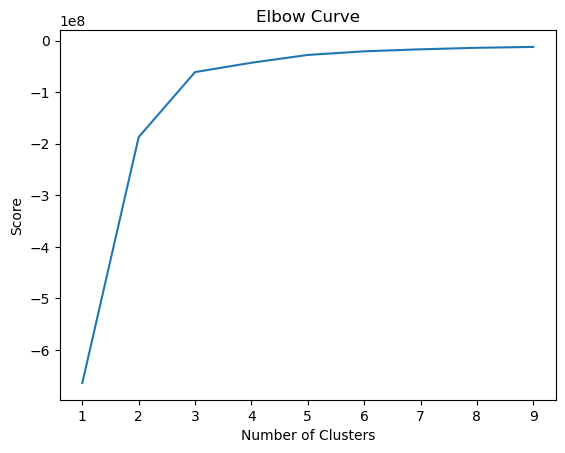

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

In [15]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pears\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [16]:
df.head()

,No,Date,House age,D. metro,N. shops,Latitude,Longitude,Price per unit,clusters
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,1
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,1
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,1
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,1
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,1


In [17]:
df['clusters'].value_counts()

1    280
0     93
2     41
Name: clusters, dtype: int64

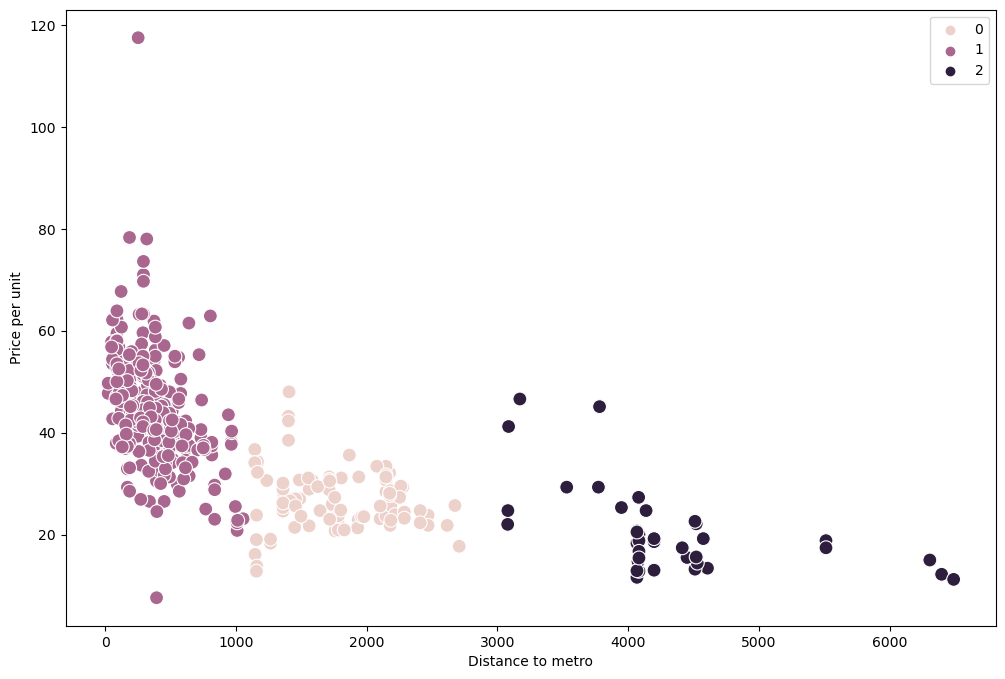

In [23]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['D. metro'], y=df['Price per unit'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting 'X' for the x and y arguments to avoid using their labels. 
# 'hue' takes the value of the attribute 'kmeans.labels_', which is the result of running the k-means algorithm.
# 's' represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance to metro') # Label x-axis.
plt.ylabel('Price per unit') # Label y-axis.
plt.show()

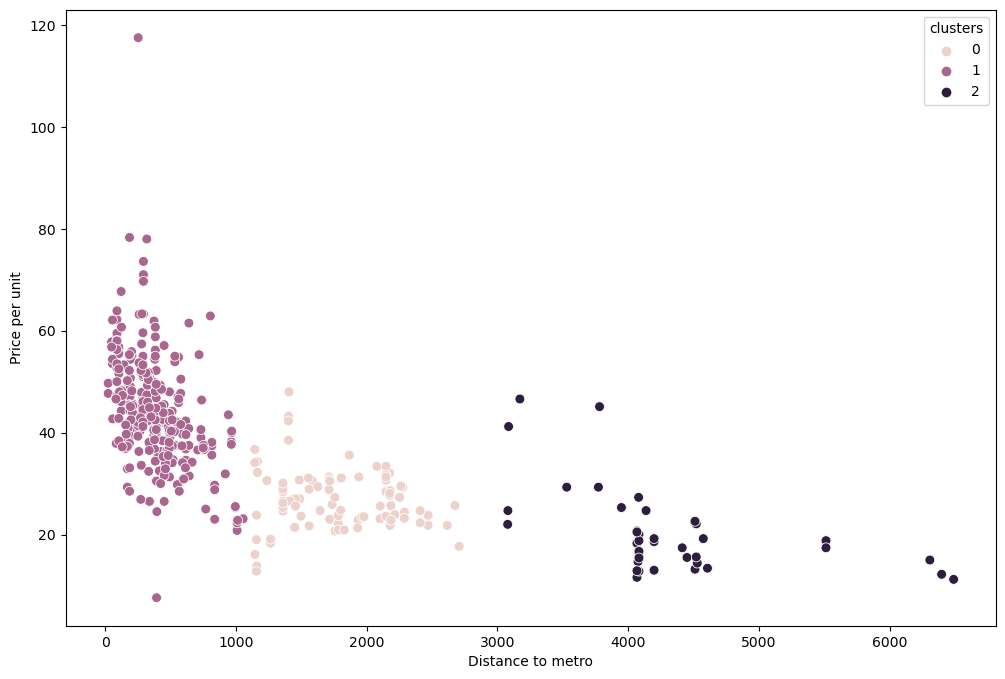

In [19]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.
# referenced df['clusters'] instead of kmeans.labels_ for 'hue'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['D. metro'], y=df['Price per unit'], hue=df['clusters'], s=50) 
# Here, you're subsetting 'X' for the x and y arguments to avoid using their labels. 
# 'hue' takes the value of the attribute 'kmeans.labels_', which is the result of running the k-means algorithm.
# 's' represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance to metro') # Label x-axis.
plt.ylabel('Price per unit') # Label y-axis.
plt.show()

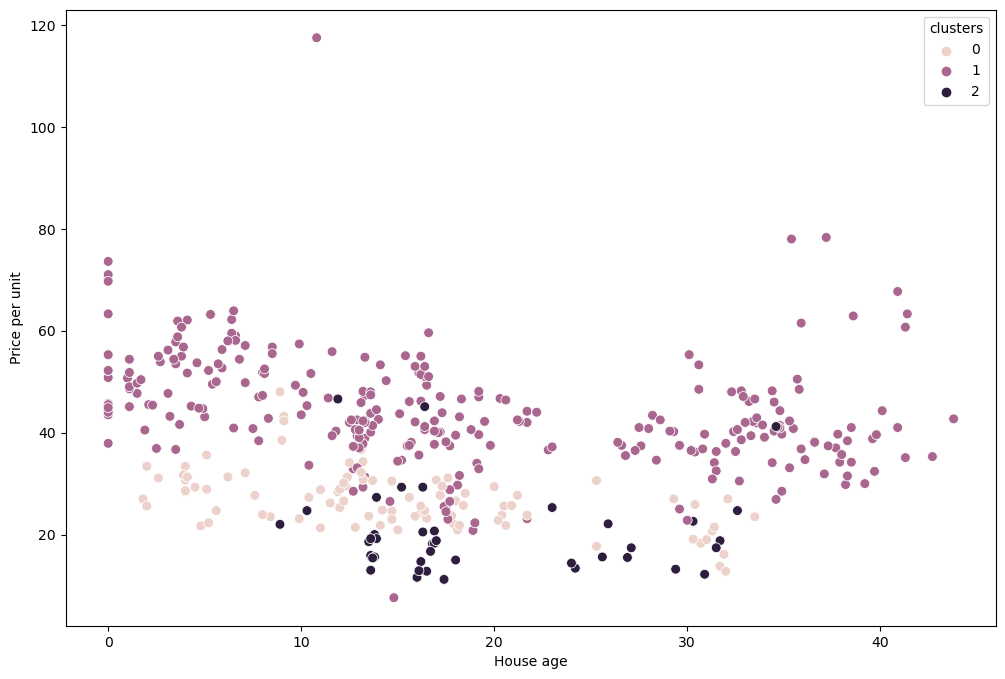

In [20]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['House age'], y=df['Price per unit'], hue=df['clusters'], s=50)

ax.grid(False) 
plt.xlabel('House age') 
plt.ylabel('Price per unit') 
plt.show()

In [21]:
df.loc[df['clusters'] == 2, 'cluster'] = '2 dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = '0 purple'
df.loc[df['clusters'] == 0, 'cluster'] = '1 pink'

In [22]:
df.groupby('cluster').agg({'N. shops':['mean', 'median'], 'House age':['mean', 'median'], 'D. metro':['mean', 'median'], 'Price per unit':['mean', 'median']})

N. shops         House age            D. metro             \
                   mean median       mean median         mean     median   
cluster                                                                    
0 purple       5.325000    5.0  18.270714   16.2   386.302676   373.6163   
1 pink         2.096774    2.0  15.229032   14.2  1767.950398  1735.5950   
2 dark purple  0.219512    0.0  19.534146   16.7  4296.208268  4082.0150   

              Price per unit         
                        mean median  
cluster                              
0 purple           44.334643   42.5  
1 pink             26.706452   26.5  
2 dark purple      20.156098   18.3